어떤 분류 모형이 있는지 살펴보고 이를 같은 데이터에 기본만 대입하여 어떤 모형이 가장 괜찮은 모형인지 살펴보고자 합니다.

- **iris 데이터(아이리스, 붓꽃 데이터)**<br>
아이리스(붓꽃)에 대한 데이터이다. 꽃잎의 각 부분의 너비와 길이등을 측정한 데이터이며 150개의 행으로 되어있다. 꽃의 종류는 setosa(세토사), versicolor(벌시컬러), virginica 3종류이다. 꽃잎의 정보를 보고 꽃의 종류를 맞추는 문제를 풀 것이다.

### 1) 데이터 불러오기

In [1]:
import numpy as np
import sklearn
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
iris_data = load_iris()

패키지를 통해 불러온 iris 데이터는 정제가 되지 않은 dictionary 형태로 되어 있습니다. 이 dictionary에서 data, class, feature_names를 이용하여 DataFrame을 생성해보겠습니다.

In [3]:
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
data = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
data['class'] = iris_data.target

In [5]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 2) 탐색적 데이터 분석

모델링 부분으로 바로 들어가도 되지만 어떤 특징이 있는지 간단히 살펴보겠습니다. 이번 단계에서는 먼저 describle를 이용해 평균 등을 살펴보고 이를 class 별로 시각화를 하여 어떤 차이가 있는지 살펴볼 것입니다.

In [6]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

<AxesSubplot:title={'center':'sepal length (cm)'}, xlabel='[class]'>

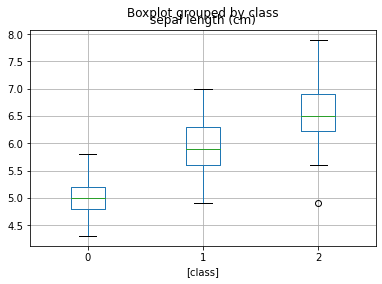

In [8]:
data[['sepal length (cm)', 'class']].boxplot(by='class')

<AxesSubplot:title={'center':'sepal width (cm)'}, xlabel='[class]'>

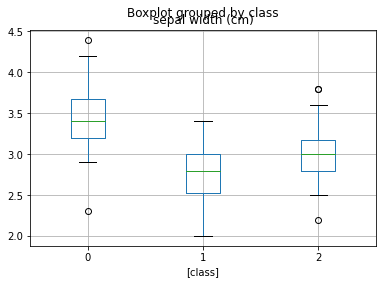

In [9]:
data[['sepal width (cm)', 'class']].boxplot(by='class')

<AxesSubplot:title={'center':'petal length (cm)'}, xlabel='[class]'>

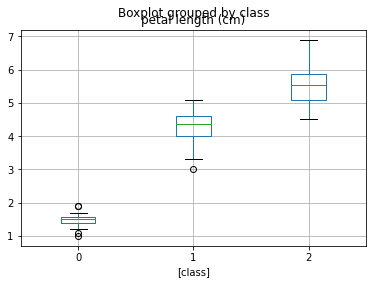

In [10]:
data[['petal length (cm)', 'class']].boxplot(by='class')

<AxesSubplot:title={'center':'petal width (cm)'}, xlabel='[class]'>

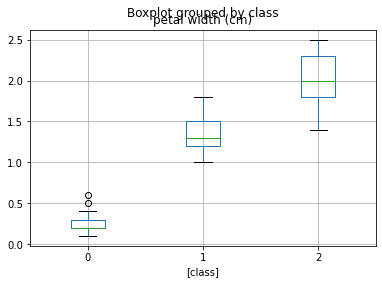

In [11]:
data[['petal width (cm)', 'class']].boxplot(by='class')

boxplot에서 살펴본 바와 같이 class 별로 붓꽃의 길이와 너비가 특징을 가지는 것을 확인할 수 있었습니다. 예로 바로 위에 있는 **petal width와 class**의 boxplot을 보았을 때 0 class를 가졌을 때 0.0 ~ 0.5 cm를 가지고 1 class를 가졌을 때 1.0 ~ 1.8 cm 사이인 특징을 찾을 수 있었습니다.

### 3) 모델링

간단한 정규화 후 모델링을 시도하겠습니다.

In [12]:
X = data[data.columns[0:4]]
y = data[['class']]

In [13]:
print(X.shape)
print(y.shape)

(150, 4)
(150, 1)


조그마한 데이터지만 test를 위해 train과 test를 나눕니다 ㅠㅠ

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, random_state=42,test_size = 0.2)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120, 1)
(30, 4)
(30, 1)


In [31]:
from sklearn.preprocessing import StandardScaler

ss =StandardScaler()
ss.fit(X_train)
ss_train = ss.transform(X_train)
ss_test = ss.transform(X_test)

#### 1) 로지스틱 회귀 분석

In [33]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(ss_train, y_train)

C:\Users\hu612\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [34]:
pred_y_train = logit.predict(ss_train)
pred_y_test = logit.predict(ss_test)

In [35]:
print("model score train : ",model.score(ss_train, y_train))
print("model score test : ",model.score(ss_test, y_test))

model score train :  0.9583333333333334
model score test :  0.9333333333333333


In [36]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred_y_test)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]], dtype=int64)

#### 2) 나이브 베이즈

In [38]:
from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()
bayes.fit(ss_train, y_train)

C:\Users\hu612\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [39]:
pred_y_train = bayes.predict(ss_train)
pred_y_test = bayes.predict(ss_test)

In [40]:
print("model score train : ",model.score(ss_train, y_train))
print("model score test : ",model.score(ss_test, y_test))

model score train :  0.9583333333333334
model score test :  0.9666666666666667


In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred_y_test)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)

#### 3) 의사결정나무

In [50]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(ss_train, y_train)

DecisionTreeClassifier()

In [51]:
pred_y_train = tree.predict(ss_train)
pred_y_test = tree.predict(ss_test)

In [52]:
print("model score train : ",tree.score(ss_train, y_train))
print("model score test : ",tree.score(ss_test, y_test))

model score train :  1.0
model score test :  0.9333333333333333


In [53]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred_y_test)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]], dtype=int64)

#### 4) 랜덤포레스트

In [54]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()
random.fit(ss_train, y_train)

<ipython-input-54-f890ffc7441c>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random.fit(ss_train, y_train)


RandomForestClassifier()

In [55]:
pred_y_train = random.predict(ss_train)
pred_y_test = random.predict(ss_test)

In [56]:
print("model score train : ",random.score(ss_train, y_train))
print("model score test : ",random.score(ss_test, y_test))

model score train :  1.0
model score test :  0.9333333333333333


In [57]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred_y_test)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]], dtype=int64)

#### 5) 서포트 벡터 머신

In [59]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(ss_train, y_train)

C:\Users\hu612\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [60]:
pred_y_train = svc.predict(ss_train)
pred_y_test = svc.predict(ss_test)

In [61]:
print("model score train : ",svc.score(ss_train, y_train))
print("model score test : ",svc.score(ss_test, y_test))

model score train :  0.975
model score test :  0.9666666666666667


In [62]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred_y_test)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)

#### 6) 최근접이웃법(K-Neighbors, KNN)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(ss_train,y_train)

<ipython-input-66-050e4cc06ec8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(ss_train,y_train)


KNeighborsClassifier()

In [67]:
pred_y_train = knn.predict(ss_train)
pred_y_test = knn.predict(ss_test)

In [68]:
print("model score train : ",knn.score(ss_train, y_train))
print("model score test : ",knn.score(ss_test, y_test))

model score train :  0.975
model score test :  0.9333333333333333


In [69]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred_y_test)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  8]], dtype=int64)

이를 표로 나타내면 다음과 같습니다.

|모형|train|test|
|------|---|---|
|로지스틱 회귀|0.9583|0.9333|
|나이브베이즈|0.9583|0.9666|
|의사결정나무|1.0|0.9333|
|랜덤포레스트|1.0|0.9333|
|SVC|0.975|0.9666|
|KNN|0.9750|0.9333|



- 간단한 전처리 후 모형을 비교하면 다음과 같습니다. 위 결과라면 **서포트 벡터 머신**을 이용하여 모델링을 할 것입니다!! <br> 
- 오늘은 간단하게 iris 데이터를 이용하여 분류 모형에 관해 정리를 해보았습니다.<br> 
- 자세한 설명은 다음 차시부터 모형 하나하나씩 설명하면서 다른 기법들도 설명하겠습니다.<br> 
감사합니다!